In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("spam.csv",encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
# axis=0 ---> index   axis=1 ---> column için

In [6]:
df.columns=["Class","Text"]

In [7]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df["Label"] = df["Class"].map({"ham":0,"spam":1})

In [9]:
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


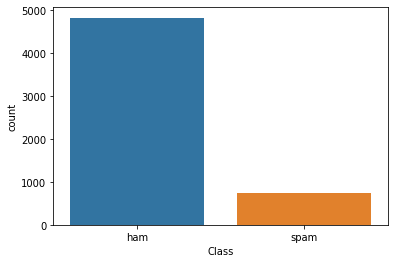

In [10]:
sns.countplot(x=df["Class"]);

In [11]:
df['Text'] = df['Text'].str.lower()
df['Text'] = df['Text'].str.replace('[^\w\s]','')
df['Text'] = df['Text'].str.replace('\d+','')
df['Text'] = df['Text'].str.replace('\n','').replace('\r','')

In [12]:
df.head()

,Class,Text,Label
0,ham,go until jurong point crazy available only in ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry in a wkly comp to win fa cup final...,1
3,ham,u dun say so early hor u c already then say,0
4,ham,nah i dont think he goes to usf he lives aroun...,0


In [17]:
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [30]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask = np.array(Image.open("alice_mask.png"))
    wc = WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

In [31]:
ham = df[df['Class']=='ham']['Text']
spam = df[df['Class']=='spam']['Text']

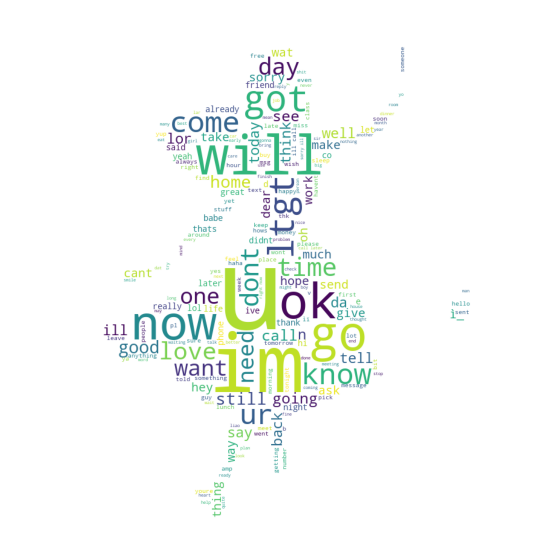

In [32]:
wc(ham,'white')

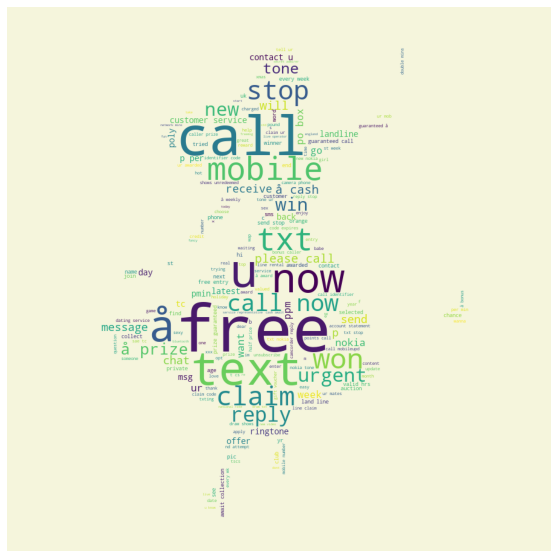

In [33]:
wc(spam,'beige')

In [34]:
x = df['Text']
y = df['Label']

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [36]:
vect = CountVectorizer(stop_words='english')

In [37]:
x = vect.fit_transform(x)

In [38]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42)

In [39]:
mb = MultinomialNB()

In [40]:
pred = mb.fit(x_train,y_train).predict(x_test)

In [41]:
accuracy_score(pred,y_test)

0.9712849964106246

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
d = DecisionTreeClassifier()

In [44]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
pred2 = d.fit(x_train,y_train).predict(x_test)

In [46]:
accuracy_score(pred,y_test)

0.9712849964106246